In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import fetch_openml

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [71]:
# projekt  1

In [72]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

In [73]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

C:\Users\46736\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [76]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [77]:
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:6000]
y_val = y[5000:6000]

X_test = X[6000:7000]
y_test = y[6000:7000]

# Standardizing the data (as you generally always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 

In [78]:
print(X_train.shape)
print(X_test.shape)
y_test.shape

(5000, 784)
(1000, 784)


(1000,)

In [79]:
# X_val.shape
y_train.shape
#y_test.shape
#y_val.shape



(5000,)

In [80]:
#f
print(y[20:100])

[4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0
 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6
 8 0 7 8 3 1]


In [81]:
y_train = y_train.reshape(-1, 1)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Skapa och träna en Random Forest-modell
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_clf.fit(X_train, y_train)

# Gör förutsägelser på valideringsdata och beräkna noggrannheten
rf_val_predictions = random_forest_clf.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)

# Skriv ut noggrannheten för Random Forest-modellen
print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.2f}")


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Validation Accuracy: 0.94


In [83]:
from sklearn.neighbors import KNeighborsClassifier

# Skapa och träna en k-NN-modell
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

# Gör förutsägelser på valideringsdata och beräkna noggrannheten
knn_val_predictions = knn_clf.predict(X_val)
knn_val_accuracy = accuracy_score(y_val, knn_val_predictions)

# Skriv ut noggrannheten för k-NN-modellen
print(f"k-NN Validation Accuracy: {knn_val_accuracy:.2f}")


k-NN Validation Accuracy: 0.94


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [84]:


# 3. Träna en Neural Network-modell
nn_clf = MLPClassifier(hidden_layer_sizes=(128,), max_iter=20, random_state=42)
nn_clf.fit(X_train, y_train)

# Utvärdera på valideringsdata
nn_val_predictions = nn_clf.predict(X_val)
nn_val_accuracy = accuracy_score(y_val, nn_val_predictions)
print(f"Neural Network Validation Accuracy: {nn_val_accuracy:.2f}")

# 4. Skala data för SVM-modeller
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# 5. Träna SVM-modeller och utvärdera på testdata
models = [
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='poly')
]

for model in models:
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {type(model).__name__} - Accuracy: {accuracy:.2f}")


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network Validation Accuracy: 0.89
Model SVC - Accuracy: 0.92


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model SVC - Accuracy: 0.91


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model SVC - Accuracy: 0.82


In [85]:
from sklearn.svm import SVC

# Skapa en lista över SVM-modeller med olika kärnor
models = [
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='poly')
]

# Loopa över varje modell, träna den och utvärdera dess noggrannhet på testdata
for model in models:
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {type(model).__name__} - Accuracy: {accuracy:.2f}")


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model SVC - Accuracy: 0.92


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model SVC - Accuracy: 0.91


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model SVC - Accuracy: 0.82


In [86]:
from sklearn.model_selection import GridSearchCV

# Definiera parametrarna för varje modell
param_grid = [
    {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]},
    {'n_neighbors': [3, 5, 7]},
    {'hidden_layer_sizes': [(64,), (128,), (256,)], 'max_iter': [20, 50, 100]}
]

# Definiera modellerna för grid search
models = [
    {'model': RandomForestClassifier(), 'param_grid': param_grid[0]},
    {'model': KNeighborsClassifier(), 'param_grid': param_grid[1]},
    {'model': MLPClassifier(), 'param_grid': param_grid[2]}
]

# Utför grid search för varje modell
for model_info in models:
    model = model_info['model']
    param_grid = model_info['param_grid']
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {type(model).__name__}: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.2f}")


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\46736\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Best parameters for RandomForestClassifier: {'max_depth': None, 'n_estimators': 150}
Best cross-validation score: 0.94


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Best parameters for KNeighborsClassifier: {'n_neighbors': 3}
Best cross-validation score: 0.93


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters for MLPClassifier: {'hidden_layer_sizes': (256,), 'max_iter': 50}
Best cross-validation score: 0.91


In [87]:

# Definiera modellerna
models = [
    {'model': RandomForestClassifier(n_estimators=100, random_state=42), 'name': 'Random Forest'},
    {'model': KNeighborsClassifier(n_neighbors=3), 'name': 'k-NN'},
    {'model': MLPClassifier(hidden_layer_sizes=(128,), max_iter=20, random_state=42), 'name': 'Neural Network'}
]

# Träna och utvärdera varje modell
for model_info in models:
    model = model_info['model']
    model_name = model_info['name']
    
    # Träna modellen
    model.fit(X_train_scaled, y_train)
    
    # Gör förutsägelser på valideringsdata
    val_predictions = model.predict(X_val_scaled)
    
    # Beräkna noggrannheten
    val_accuracy = accuracy_score(y_val, val_predictions)
    
    # Skriv ut resultatet
    print(f"Validation Accuracy for {model_name}: {val_accuracy:.2f}")


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Validation Accuracy for Random Forest: 0.94
Validation Accuracy for k-NN: 0.90


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation Accuracy for Neural Network: 0.93


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


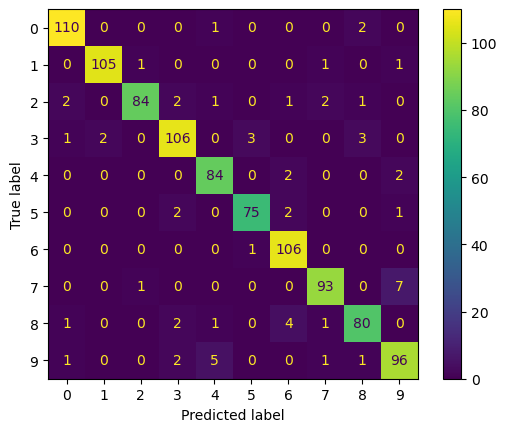

In [88]:
rf_val_conf_matrix = confusion_matrix(y_val, rf_val_predictions)
display_confusion_matrix(y_val, rf_val_predictions)

In [91]:
estimators = [ random_forest_clf, knn_clf, nn_clf
    
]
for estimator in estimators:
    print('Score', estimator.score(X_val, y_val))

ValueError: Found input variables with inconsistent numbers of samples: [20, 1000]

In [92]:
estimators = [random_forest_clf, knn_clf, nn_clf]

for estimator in estimators:
    score = estimator.score(X_val, y_val)
    print(f"Model {type(estimator).__name__} - Score: {score:.2f}")


ValueError: Found input variables with inconsistent numbers of samples: [20, 1000]

In [21]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [22]:
from PIL import Image
import cv2


In [23]:
# Ladda in MNIST-datasetet
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Definiera de bästa hyperparametrarna
best_params = {'max_depth': 20, 'n_estimators': 150}

# Skapa en RandomForestClassifier med de bästa parametrarna
random_forest_clf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                            max_depth=best_params['max_depth'],
                                            random_state=42)

# Träna modellen på träningsdatamängden
random_forest_clf.fit(X_train, y_train)


C:\Users\46736\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


RandomForestClassifier(max_depth=20, n_estimators=150, random_state=42)

In [24]:
import joblib

# Spara modellen med en korrekt formatterad sökväg
joblib.dump(random_forest_clf, rC:\Users\46736\Desktop\machine_learning_ds23-main\random_forest_trained")


SyntaxError: invalid syntax (3615199293.py, line 4)

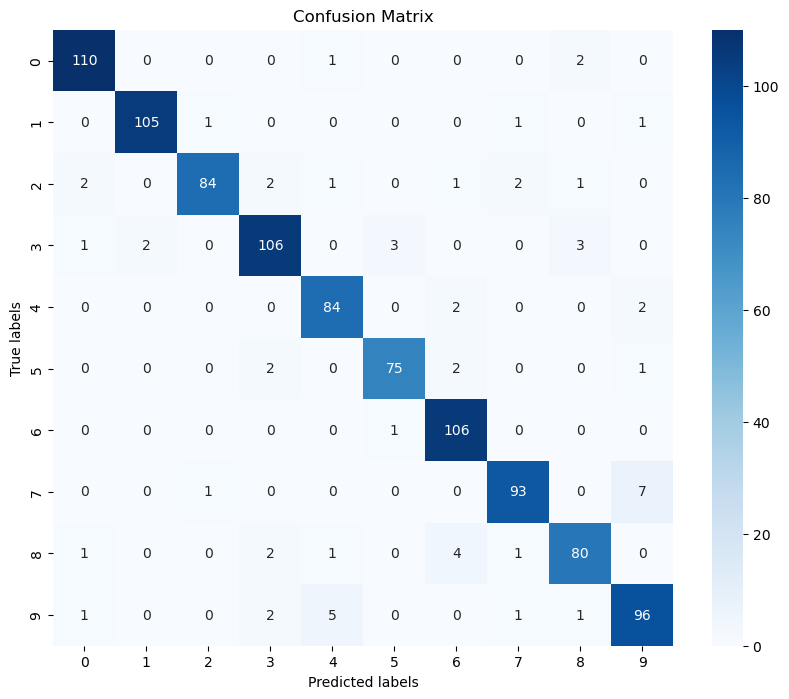

In [25]:
def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Beräkna förvirringsmatrisen för dina valideringsdata och förutsägelser
rf_val_conf_matrix = confusion_matrix(y_val, rf_val_predictions)

# Visa förvirringsmatrisen
display_confusion_matrix(y_val, rf_val_predictions)

In [26]:
# Gör förutsägelser på testdatamängden
predictions = random_forest_clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Model Accuracy on Test Data: 0.97


In [31]:
from PIL import Image


image1 = Image.open(r"C:\Users\46736\Desktop\sfror\5,1.png")


In [32]:
import cv2
import numpy as np

# Nu kan du använda OpenCV-funktioner
image_test = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2BGR)



In [20]:
# Ladda in hela MNIST-datasetet
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Definiera de bästa hyperparametrarna
best_params = {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}

# RandomForestClassifier med de bästa parametrarna
random_forest_clf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                            max_depth=best_params['max_depth'],
                                            random_state=42)
#TRÄNA 
random_forest_clf.fit(X_train, y_train)
 



C:\Users\46736\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


RandomForestClassifier(max_depth=20, n_estimators=150, random_state=42)

In [21]:
import joblib

# Spara modellen med en korrekt formatterad sökväg
joblib.dump(random_forest_clf, r"C:\Users\46736\UC\machinelearning\kundskapkontoll2_2.pkl")



['C:\\Users\\46736\\UC\\machinelearning\\kundskapkontoll2_2.pkl']

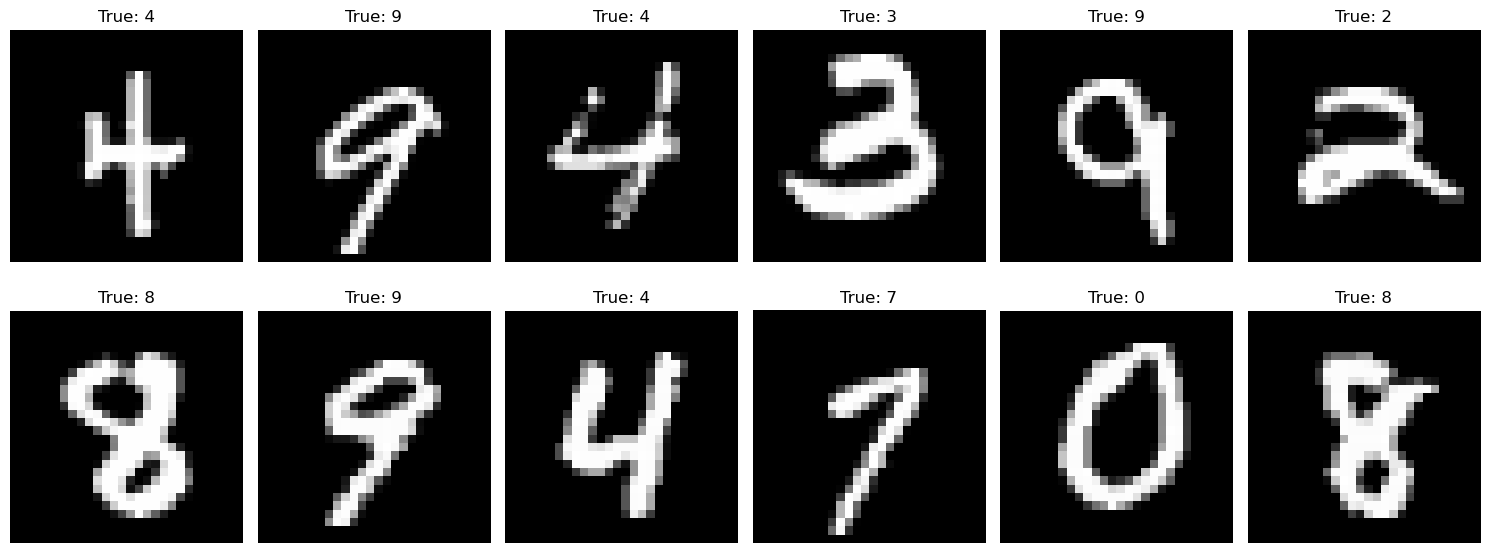

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15., 6.))

for axes_row in axes:
    for ax in axes_row:
        # Slumpmässigt välj en bild och dess sanna etikett från din testuppsättning
        test_index = np.random.randint(0, len(X_test))
        image = X_test[test_index].reshape(28, 28)
        true_label = y_test[test_index]
        
        ax.set_axis_off()
        ax.imshow(image, cmap='gray')
        ax.set_title(f'True: {true_label}')

plt.tight_layout()
plt.show()


In [52]:
resized_image = cv2.resize(gray_image, (28, 28))
flattened_image = resized_image.flatten().reshape(1, -1)

In [53]:
gray_image = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)


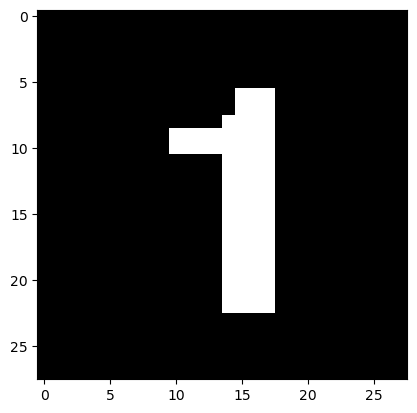

Prediction for your image: [0]


In [55]:
lower_pixel = 100
upper_pixel = 130

image1 = Image.open(r"C:\Users\46736\Desktop\3123\1.png")

# OpenCV-format
image_test = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2BGR)  

# ändra storlek
gray_image = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)  
resized_image = cv2.resize(gray_image, (28, 28))  

for i in range(resized_image.shape[0]):
    for j in range(resized_image.shape[1]):
        if resized_image[i, j] <= lower_pixel:
            resized_image[i, j] = 0
        elif resized_image[i, j] > upper_pixel:
            resized_image[i, j] = 255


flattened_image = resized_image.flatten().reshape(1, -1)
#visa
plt.imshow(resized_image, cmap=mpl.cm.binary)
plt.show()

prediction = random_forest_clf.predict(flattened_image)

# Visa resultatet
print(f"Prediction for your image: {prediction}")



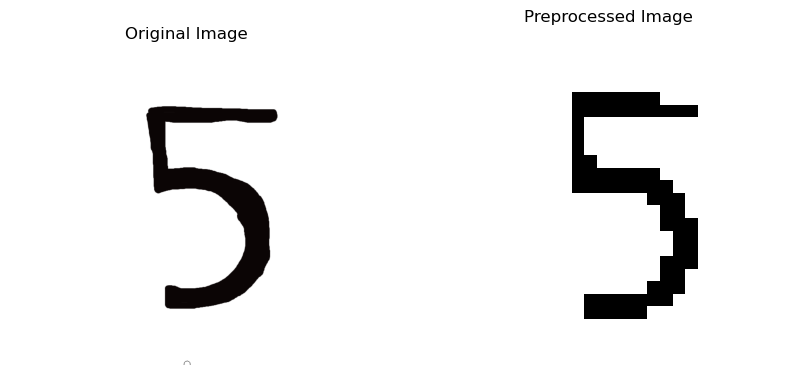

Prediction for your image: [5]


In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Definiera tröskelvärden för att justera pixlar
lower_pixel = 100
upper_pixel = 130

# Öppna bilden med OpenCV
image_path = r"C:\Users\46736\Desktop\sfror\5,1.png"
image = cv2.imread(image_path)

# Konvertera bilden till gråskala
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Ändra storlek till 28x28 pixlar
resized_image = cv2.resize(gray_image, (28, 28))

# Tröskling för att justera pixlar
_, thresholded_image = cv2.threshold(resized_image, lower_pixel, 255, cv2.THRESH_BINARY)
_, thresholded_image = cv2.threshold(thresholded_image, upper_pixel, 255, cv2.THRESH_BINARY_INV)

# Visa både originalbilden och den förbehandlade bilden
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(thresholded_image, cmap=mpl.cm.binary)
axes[1].set_title('Preprocessed Image')
axes[1].axis('off')
plt.show()

# Platta ut bilden för modellens input
flattened_image = thresholded_image.flatten().reshape(1, -1)

# Gör en förutsägelse med modellen
prediction = random_forest_clf.predict(flattened_image)

# Visa resultatet
print(f"Prediction for your image: {prediction}")



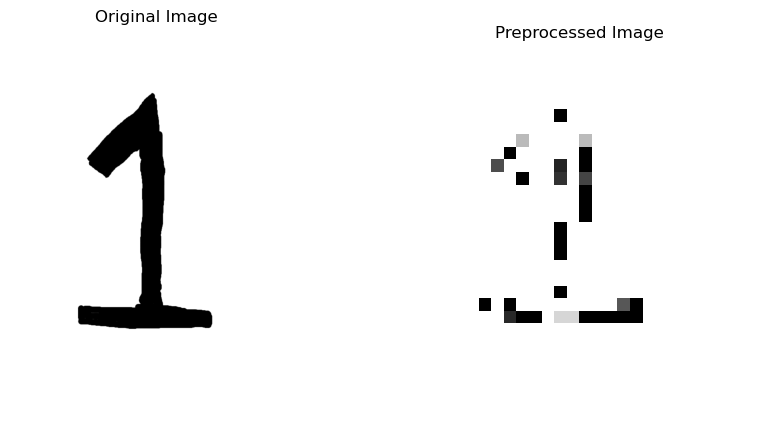

Prediction for your image: [1]


In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def preprocess_image(image_path, lower_pixel=100, upper_pixel=130):
    try:
        # Ladda in bilden och konvertera till gråskala
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError("Kunde inte öppna bild. Kontrollera sökvägen.")

        # Tillämpa adaptiv tröskling för att justera pixlar
        thresholded_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

        # Ändra storlek till 28x28 pixlar
        resized_image = cv2.resize(thresholded_image, (28, 28))

        return resized_image

    except Exception as e:
        print(f"Error: {e}")
        return None

def predict_digit(image, model):
    # Gör bilden platt för modellens input
    flattened_image = image.flatten().reshape(1, -1)
    prediction = model.predict(flattened_image)
    return prediction

def invert_colors(image):
    # Omvänd färgerna i bilden (svart till vit, vit till svart)
    inverted_image = cv2.bitwise_not(image)
    return inverted_image

def show_images(original_image, processed_image):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(processed_image, cmap='gray')
    axes[1].set_title('Preprocessed Image')
    axes[1].axis('off')
    plt.show()

def main():
    # Ladda in och förbered bilden
    image_path = r"C:\Users\46736\Desktop\sfror\1.png"
    processed_image = preprocess_image(image_path)
    if processed_image is None:
        return

    # Ändra färgerna i den förbehandlade bilden (svart till vit, vit till svart)
    inverted_processed_image = invert_colors(processed_image)

    # Visa både originalbilden och den förbehandlade bilden
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    show_images(original_image, inverted_processed_image)

    # Gör förutsägelse med modellen
    prediction = predict_digit(processed_image, random_forest_clf)

    # Visa resultatet
    print(f"Prediction for your image: {prediction}")

if __name__ == "__main__":
    main()
